In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df = pd.read_csv('./train.csv')
df.tail()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8
23010,2022-12-31,2.1,-5.1,7.2,0.0,65.5,1.4,1.1,4.16,11.5,-1.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [27]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [26]:
df = pd.read_csv('./train.csv')


# Preprocessing: Handling missing values
# Filling missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Selecting features and target variable
features = df[['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합']]
target = df['평균기온']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Building and training the linear regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
r2_score(y_test, predictions)


<ipython-input-26-e1c401571041>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


0.9971454731222937

## 시계열 모형 예측

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

train_data = pd.read_csv('./train.csv')

# Preprocessing the data
# Convert date to datetime and extract year, month, day
train_data['일시'] = pd.to_datetime(train_data['일시'])
train_data['Year'] = train_data['일시'].dt.year
train_data['Month'] = train_data['일시'].dt.month
train_data['Day'] = train_data['일시'].dt.day

# Fill missing values with median values
train_data.fillna(train_data.median(), inplace=True)

# Selecting features and target variable
features = ['Year', 'Month', 'Day', '최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율']
target = '평균기온'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set and calculating the RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse


<ipython-input-30-33c407523633>:16: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train_data.fillna(train_data.median(), inplace=True)


0.5067909992478334

In [31]:
import pandas as pd

# 파일 경로
train_path = './train.csv' # 학습 데이터 파일 경로
submission_path = './sample_submission.csv' # 제출 양식 파일 경로

# 데이터 불러오기
train_df = pd.read_csv(train_path)
submission_df = pd.read_csv(submission_path)

display(train_df.head())
display(submission_df.head())

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0


In [32]:
# 날짜 데이터 변환
train_df['일시'] = pd.to_datetime(train_df['일시'])
train_df = train_df.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
일시,,,,,,,,,,
1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA 모델 훈련
model = ARIMA(train_df['평균기온'], order=(2, 1, 3))  # p, d, q 값은 조정 필요
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
submission_df['일시'] = pd.to_datetime(submission_df['일시'])

# 예측할 기간 설정
start_date = submission_df['일시'].min()
end_date = submission_df['일시'].max()

# ARIMA 모델을 사용하여 예측
forecast = model_fit.predict(start=start_date, end=end_date, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [35]:
# 예측 결과 추출 및 확인
submission_df['평균기온'] = forecast.values
display(submission_df.head())

# 예측 결과 저장
submission_df.to_csv('./baseline_submit.csv', index=False)

,일시,평균기온
0,2023-01-01,-2.923215
1,2023-01-02,-4.701860
2,2023-01-03,-5.782038
3,2023-01-04,-6.478672
4,2023-01-05,-6.964018


In [7]:
import sys
import random
import os
import zipfile
import matplotlib
import datetime
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from pathlib import Path

# 한글 폰트
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

matplotlib.rcParams['figure.figsize'] = (16, 8)
matplotlib.rcParams['axes.grid'] = False

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed=3407
seed_everything(seed)

In [9]:
raw_train = pd.read_csv('./train.csv')
raw_train

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [10]:
# 데이터는 2000년부터 사용
df = raw_train.loc[raw_train['일시'] >= '2000-01-01']
df.reset_index(drop=True, inplace=True)

In [11]:
date_time = pd.to_datetime(df.pop('일시'), format='%Y-%m-%d')

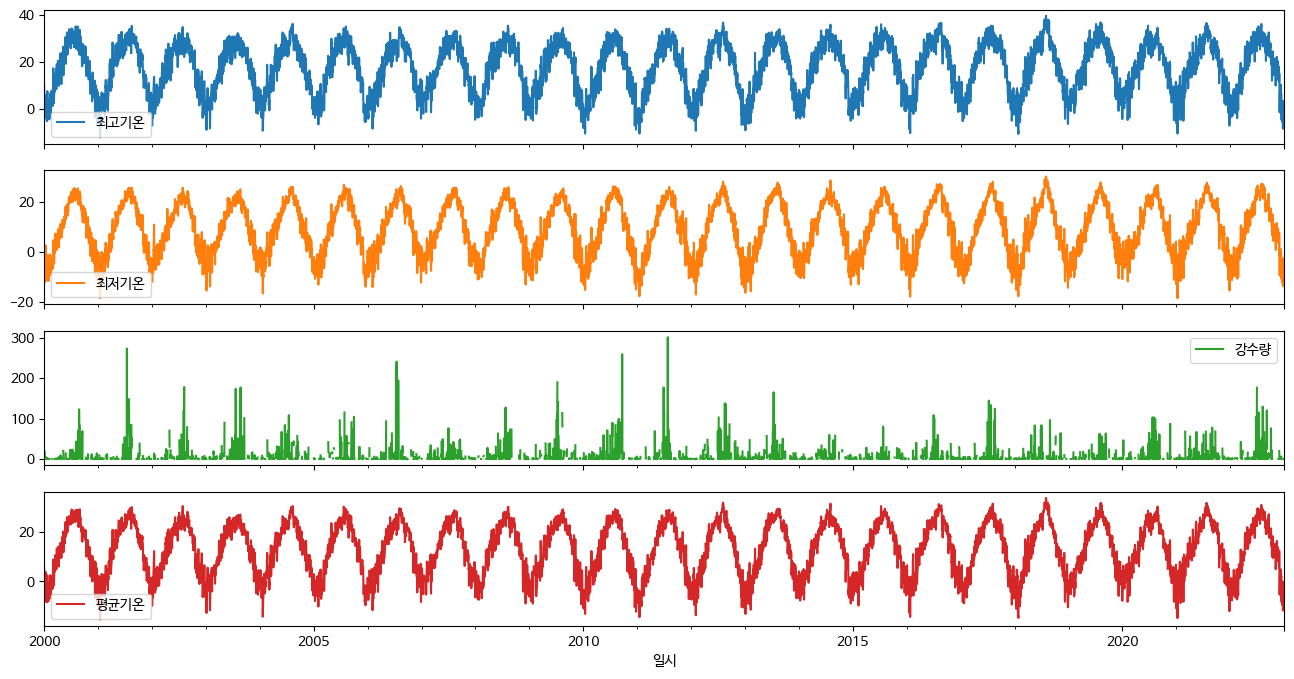

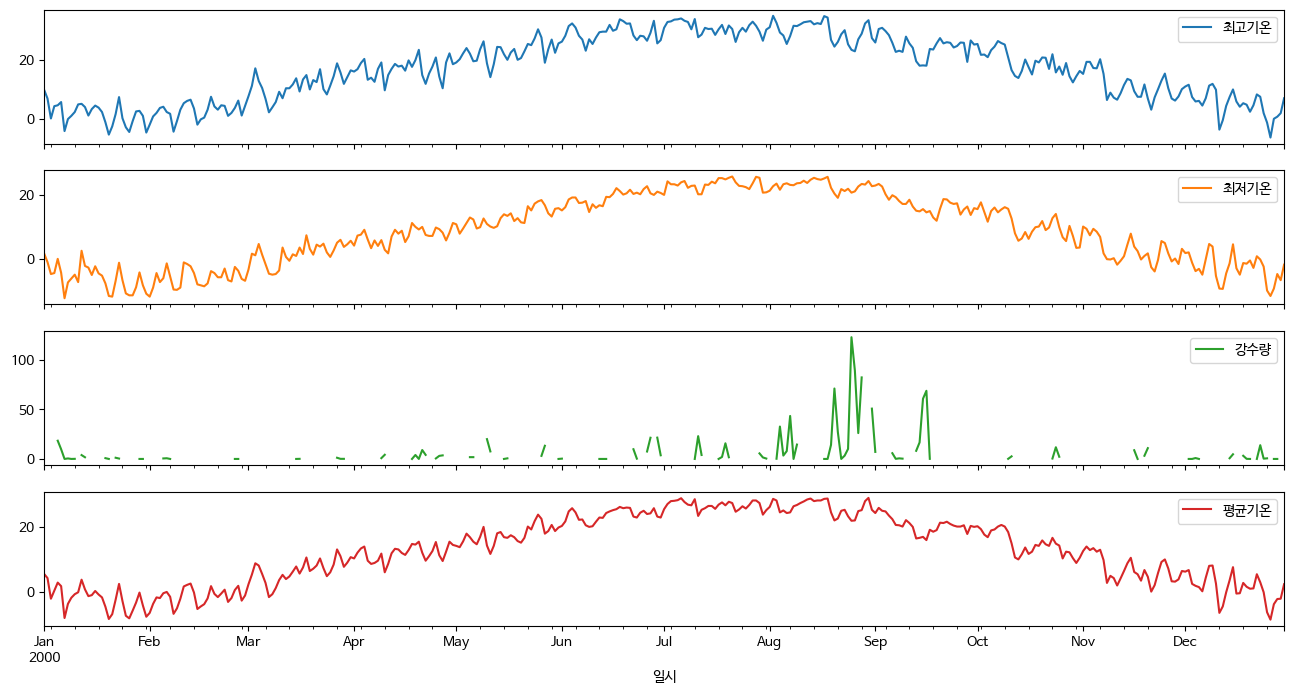

In [12]:
plot_cols = ['최고기온', '최저기온', '강수량', '평균기온']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
최고기온,8400.0,17.550119,10.700869,-12.4,8.40,19.40,26.900,39.60
최저기온,8400.0,9.095274,10.624205,-18.6,0.30,9.90,18.625,30.30
일교차,8399.0,8.453518,2.854957,1.1,6.50,8.40,10.400,18.50
강수량,3272.0,9.899725,23.041582,0.0,0.10,1.50,8.500,301.50
평균습도,8401.0,61.033722,14.880473,17.9,49.90,61.00,71.500,99.80
평균풍속,8398.0,2.343510,0.835757,0.3,1.80,2.20,2.800,7.50
일조합,8387.0,5.839883,3.924444,0.0,2.00,6.50,9.100,13.70
일사합,8373.0,12.590828,6.693488,0.0,7.54,11.71,17.400,31.11
일조율,8401.0,48.804273,32.735833,0.0,16.30,54.20,79.800,96.90
평균기온,8401.0,12.990263,10.513069,-15.5,4.10,14.30,22.400,33.70


In [14]:
null_cols = ['최고기온', '최저기온', '평균풍속', '일조합', '일사합']
for col in null_cols:
  df[col].interpolate(method='linear', inplace=True)

df['일교차'] = df['최고기온'] - df['최저기온']

In [15]:
df.loc[df['강수량'].isnull(), '강수량'] = 0.0

In [16]:
df.isnull().sum()

최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

In [17]:
df.drop('일교차', axis=1, inplace=True)

In [18]:
# 날짜 데이터
date_data = pd.date_range(start='2000-01-01', end='2022-12-31', freq='D')

# 일 단위 추출
day_of_year = date_data.dayofyear

# 주기 함수로 변환
df['Day sin'] = np.sin(2 * np.pi * day_of_year / 365)
df['Day cos'] = np.cos(2 * np.pi * day_of_year / 365)

Text(0.5, 1.0, 'Time of day signal')

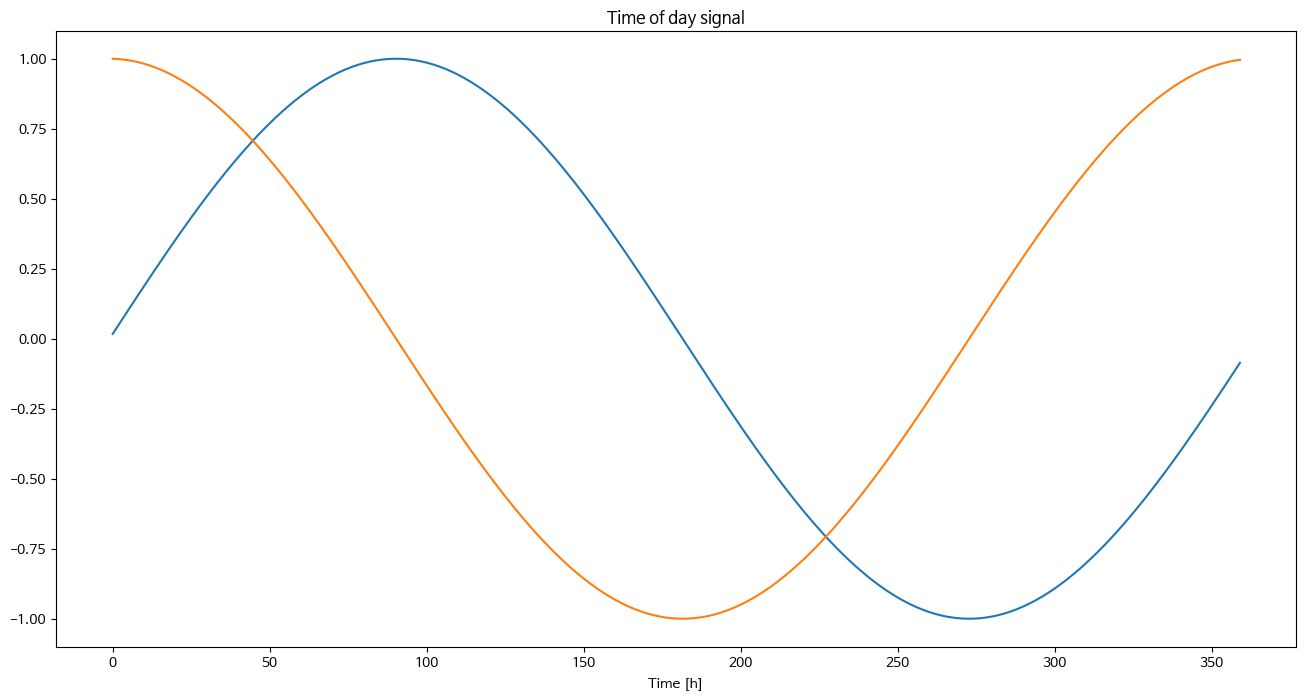

In [19]:
plt.plot(np.array(df['Day sin'])[:360])
plt.plot(np.array(df['Day cos'])[:360])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [20]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):]

num_features = df.shape[1]

In [21]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std

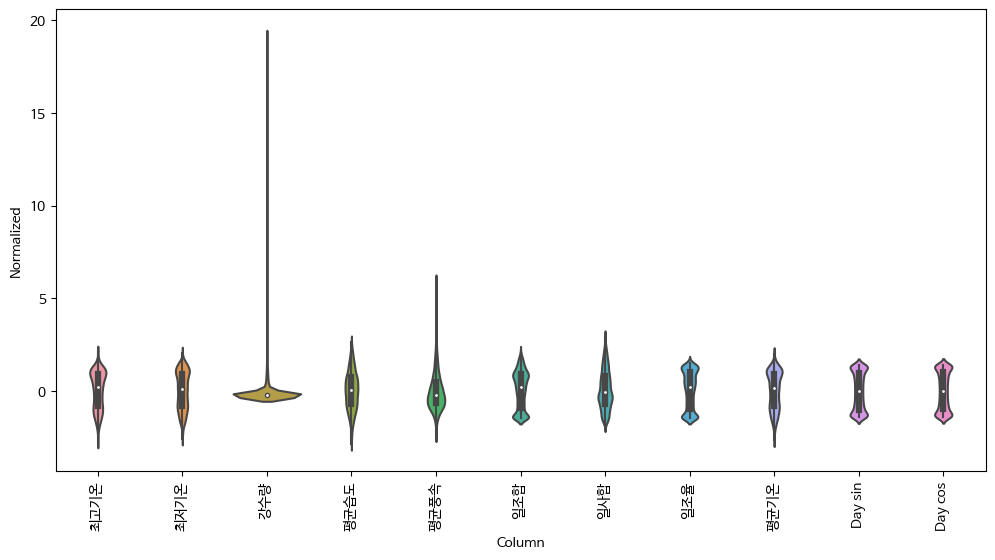

In [22]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [23]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [24]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [25]:
def plot(self, model=None, plot_col='평균기온', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [26]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [27]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.example = example

In [28]:
MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min',
                                                    restore_best_weights=True)

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [29]:
OUT_STEPS = 358
INPUT_WIDTH = OUT_STEPS * 3
multi_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=['평균기온'])

multi_window.train.element_spec

(TensorSpec(shape=(None, 1074, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 358, 1), dtype=tf.float32, name=None))

In [30]:
multi_val_performance = {}
multi_performance = {}

In [31]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, 1])
])

history = compile_and_fit(multi_lstm_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, verbose=0)

Epoch 1/30
166/166 [==============================] - 27s 105ms/step - loss: 0.1645 - mean_absolute_error: 0.2990 - val_loss: 0.0981 - val_mean_absolute_error: 0.2469
Epoch 2/30
166/166 [==============================] - 17s 99ms/step - loss: 0.0938 - mean_absolute_error: 0.2377 - val_loss: 0.0985 - val_mean_absolute_error: 0.2474
Epoch 3/30
166/166 [==============================] - 17s 100ms/step - loss: 0.0939 - mean_absolute_error: 0.2377 - val_loss: 0.1014 - val_mean_absolute_error: 0.2508
Epoch 4/30
166/166 [==============================] - 16s 98ms/step - loss: 0.0923 - mean_absolute_error: 0.2356 - val_loss: 0.0998 - val_mean_absolute_error: 0.2485
Epoch 5/30
166/166 [==============================] - 16s 96ms/step - loss: 0.0917 - mean_absolute_error: 0.2346 - val_loss: 0.1058 - val_mean_absolute_error: 0.2567
Epoch 6/30
8/8 [==============================] - 0s 40ms/step - loss: 0.0981 - mean_absolute_error: 0.2469


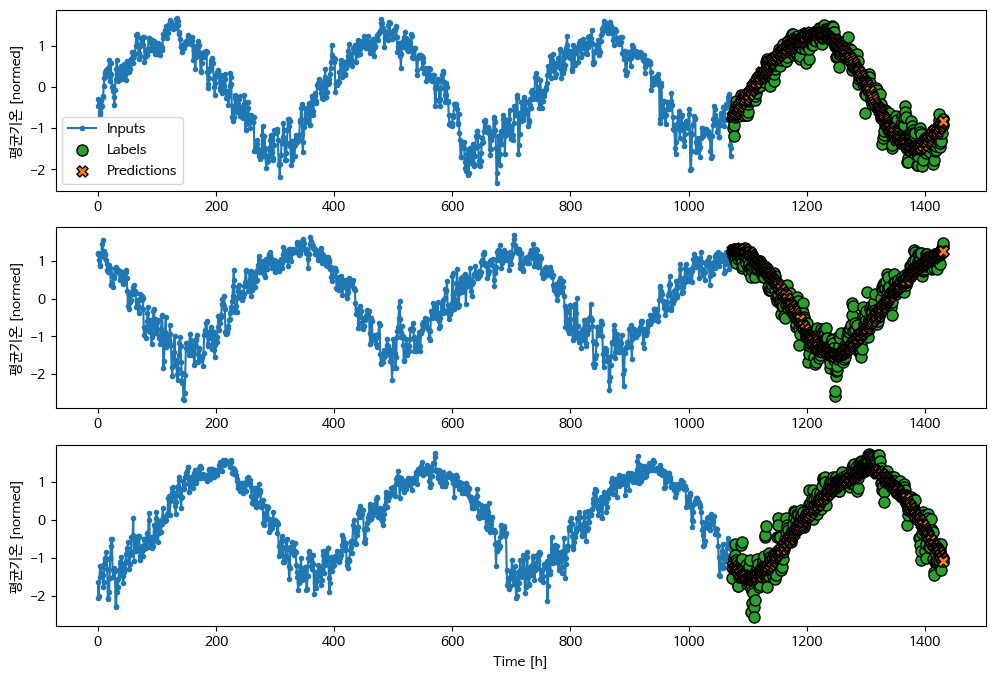

In [32]:
multi_window.plot(multi_lstm_model)

In [33]:
input_for_submit = val_df[-INPUT_WIDTH:].values.reshape(1, INPUT_WIDTH, 11)

## automl

In [40]:
!pip3 install auto-sklearn

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import auto_sklearn.regression


ModuleNotFoundError: ignored